<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: 
Use machine learning to create a model that predicts which passengers **survived the Titanic** shipwreck.

## Load data

In [ ]:
! pip install -q kaggle
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 26.7MB/s]


In [ ]:
import zipfile

In [ ]:
path = '/content/titanic.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/titanic')

## Import required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv('/content/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Lets pull some basic information on data

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As seen, Age is missing for some passengers, Survival rate for given data is 38% 😞, Minimnum age is 0.42, possibly an infant so lets check if infants survived

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


cabin, embarked also seem to be missing

In [ ]:
df[df.isnull().any(axis=1)] #rows with missing values 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


number of rows with missing value is large  hence removing/ dropping these values will not work

dropping some unnecessory columns and tranforming some values to numeric

filling fare value for test data

In [ ]:
test_df.loc[152,'Fare'] = test_df[test_df.Pclass==3].Fare.mean()


Filling embarked with the most common Port of Embarkation i,e. S 

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.fillna(value='S', inplace=True)

fill cabin values

In [ ]:
df.Cabin.fillna(value='X', inplace=True)

In [ ]:
cabin = df[['PassengerId','Fare','Cabin']].sort_values(by='Fare')

In [ ]:
cabin['Cut1'] = pd.qcut(cabin[cabin.Cabin!='X'].Fare,5)
cabin

,PassengerId,Fare,Cabin,Cut1
271,272,0.0000,X,NaN
597,598,0.0000,X,NaN
302,303,0.0000,X,NaN
633,634,0.0000,X,NaN
277,278,0.0000,X,NaN
...,...,...,...,...
438,439,263.0000,C23 C25 C27,"(108.9, 512.329]"
341,342,263.0000,C23 C25 C27,"(108.9, 512.329]"
737,738,512.3292,B101,"(108.9, 512.329]"
258,259,512.3292,X,NaN


In [ ]:
def func(l):
  res = ['A','B','C','D','E']
  dict = [0,0,0,0,0]
  for i in l:
    if 'A' in i:
      dict[0]+=1
    elif 'B' in i:
      dict[1]+=1    
    elif 'C' in i:
      dict[2]+=1    
    elif 'D' in i:
      dict[3]+=1   
    elif 'E' in i:
      dict[4]+=1
  return res[dict.index(max(dict))]
  

In [ ]:
cabin.Cut1.unique()

[NaN, (-0.001, 26.55], (26.55, 49.603], (49.603, 76.083], (76.083, 108.9], (108.9, 512.329]]
Categories (5, interval[float64, right]): [(-0.001, 26.55] < (26.55, 49.603] < (49.603, 76.083] <
                                           (76.083, 108.9] < (108.9, 512.329]]

In [ ]:
cabin_filler = cabin[cabin.Cabin!='X'].groupby('Cut1')['Cabin'].apply(func)
cabin_filler

Cut1
(-0.001, 26.55]     E
(26.55, 49.603]     C
(49.603, 76.083]    B
(76.083, 108.9]     C
(108.9, 512.329]    C
Name: Cabin, dtype: object

In [ ]:
cabin1 = cabin[cabin.Cabin == 'X'].copy()

In [ ]:
cabin1

,PassengerId,Fare,Cabin,Cut1
271,272,0.0000,X,NaN
597,598,0.0000,X,NaN
302,303,0.0000,X,NaN
633,634,0.0000,X,NaN
277,278,0.0000,X,NaN
...,...,...,...,...
708,709,151.5500,X,NaN
856,857,164.8667,X,NaN
380,381,227.5250,X,NaN
557,558,227.5250,X,NaN


In [ ]:
bins = cabin.Cut1.unique().categories
cabin1['Cut1'] = pd.cut(cabin1.Fare, bins)
cabin1.Cut1.fillna(value=cabin1.iloc[-2,3],inplace=True)


In [ ]:
def cabin_func(l):
  if l[0] == 'X' or pd.isnull(l[0]):
    return l[1]
  else:
    return l[0][0]

In [ ]:
df_tmp = df.merge(cabin1[['PassengerId','Cut1','Fare']].merge(cabin_filler,on='Cut1')[['PassengerId','Cabin']] , on = 'PassengerId',how ='left') 
df_tmp = df_tmp[['PassengerId','Cabin_x','Cabin_y']]
df_tmp.Cabin_y.fillna(value='Y',inplace = True)
df_tmp['Cabin'] = df_tmp[['Cabin_x','Cabin_y']].apply(cabin_func,axis=1)


In [ ]:
df.Cabin = df_tmp.Cabin

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,E,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,E,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [ ]:
bins = cabin.Cut1.unique().categories
test_df['Cut1'] = pd.cut(test_df.Fare, bins)

In [ ]:
test_df[test_df.isna().Age]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cut1
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,E,S,"(-0.001, 26.55]"
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,C,S,"(26.55, 49.603]"
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,E,C,"(-0.001, 26.55]"
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,E,S,"(-0.001, 26.55]"
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,E,S,"(-0.001, 26.55]"
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,E,Q,"(-0.001, 26.55]"
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,E,Q,"(-0.001, 26.55]"
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,E,S,"(-0.001, 26.55]"
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,E,S,"(-0.001, 26.55]"


In [ ]:
test_df['Cabin'] = test_df.merge(cabin_filler,on='Cut1',how ='left')[['Cabin_x','Cabin_y']].apply(cabin_func,axis=1)

In [ ]:
del test_df['Cut1']

now need to deal with age missing values

names of missing age rows  have  'Mr.','Mrs.','Miss.','Master.','Dr.'

So we will fill empty values corresponding to mean age of these titles

In [ ]:
mr_age =  df[df.Name.str.find('Mr.') !=-1 ]['Age'].mean()
mrs_age =  df[df.Name.str.find('Mrs.') !=-1 ]['Age'].mean()
master_age =  df[df.Name.str.find('Master.') !=-1 ]['Age'].mean()
miss_age =  df[df.Name.str.find('Miss.') !=-1 ]['Age'].mean()
dr_age =  df[df.Name.str.find('Dr.') !=-1 ]['Age'].mean()
ms_age =  df[df.Name.str.find('Ms.') !=-1 ]['Age'].mean()


def age_filler(info):
  age = info[1]
  name = info[0]
  if pd.isnull(age):
    if 'Ms.' in name:
      return ms_age
    elif 'Mr.' in name:
      return mr_age
    elif 'Mrs.' in name:
      return mrs_age
    elif 'Miss.' in name:
      return miss_age
    elif 'Master.' in name:
      return master_age
    elif 'Dr.' in name:
      return dr_age
  else:
    return age

In [ ]:
df['Age'] = df[['Name','Age']].apply(age_filler,axis=1)

In [ ]:
test_df['Age'] = test_df[['Name','Age']].apply(age_filler,axis=1)

All values have been filled

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Lets do some visualization

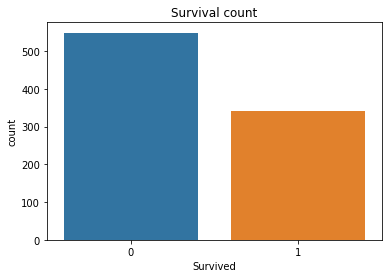

In [ ]:
sns.countplot(x=df['Survived']).set_title('Survival count');

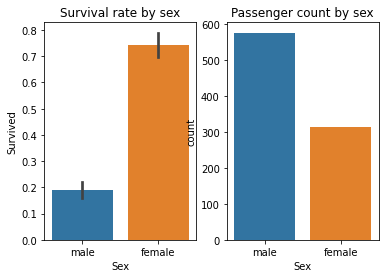

In [ ]:
fig, ax = plt.subplots(1,2)
sns.barplot(y=df.Survived, x=df.Sex, ax= ax[0]).set_title('Survival rate by sex')
sns.countplot(x=df.Sex, ax= ax[1]).set_title("Passenger count by sex");

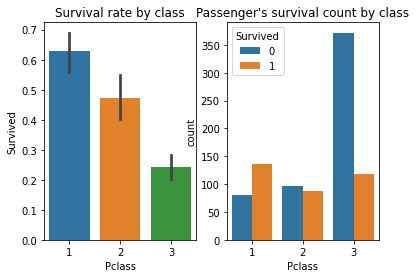

In [ ]:
fig, ax = plt.subplots(1,2)
sns.barplot(y=df.Survived, x=df.Pclass, ax= ax[0]).set_title('Survival rate by class')
sns.countplot(x=df.Pclass, hue = df.Survived, ax= ax[1]).set_title("Passenger's survival count by class");

clearly belonging to Lower class didn't help their survival chances 

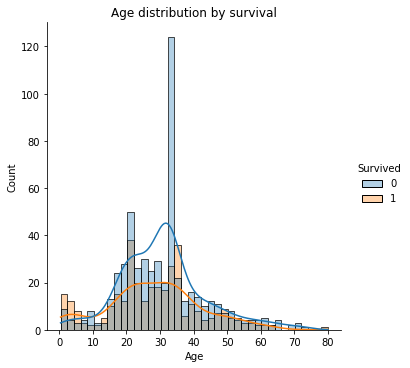

In [ ]:
sns.displot(data=df,x='Age',hue='Survived' ,kde="True",bins = 40,alpha=0.34).set(title='Age distribution by survival');

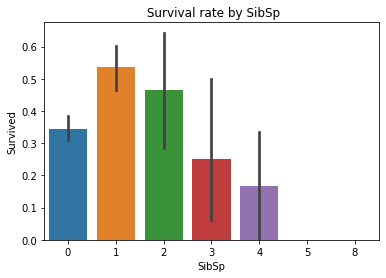

In [ ]:
sns.barplot(data=df,x='SibSp',y='Survived').set(title=' Survival rate by SibSp');

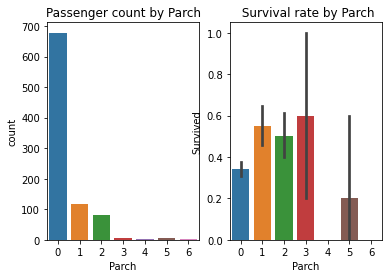

In [ ]:
fig,ax = plt.subplots(1,2)
sns.countplot(data=df,x='Parch',ax=ax[0]).set(title='Passenger count by Parch')
sns.barplot(data=df,x='Parch',y='Survived',ax=ax[1]).set(title=' Survival rate by Parch');

Tranfrorm data to numerics

In [ ]:
sex={'male':0,'female':1}
df=df.replace({'Sex':sex})
test_df=test_df.replace({'Sex':sex})

In [ ]:
embark={'S':1 ,'Q':2,'C':3}
df=df.replace({'Embarked':embark})
test_df=test_df.replace({'Embarked':embark})

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,E,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,E,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,E,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,E,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.773973,1,2,W./C. 6607,23.4500,E,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C,3


In [ ]:
features_train = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]#,'Cabin']]
target_train = df.Survived

In [ ]:
features_test = test_df[['Pclass','Sex','Age','SibSp','Parch','Fare']]#,'Cabin']]

# RANDOM FOREST MODEL 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = target_train

X = pd.get_dummies(features_train)
X_test = pd.get_dummies(features_test)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
